In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [5]:
chessdata = pd.read_csv('classicalLowRatingData.csv')
chessdata['Opening_new'].describe()



count                  5271
unique                   86
top       Queen's Pawn Game
freq                    573
Name: Opening_new, dtype: object

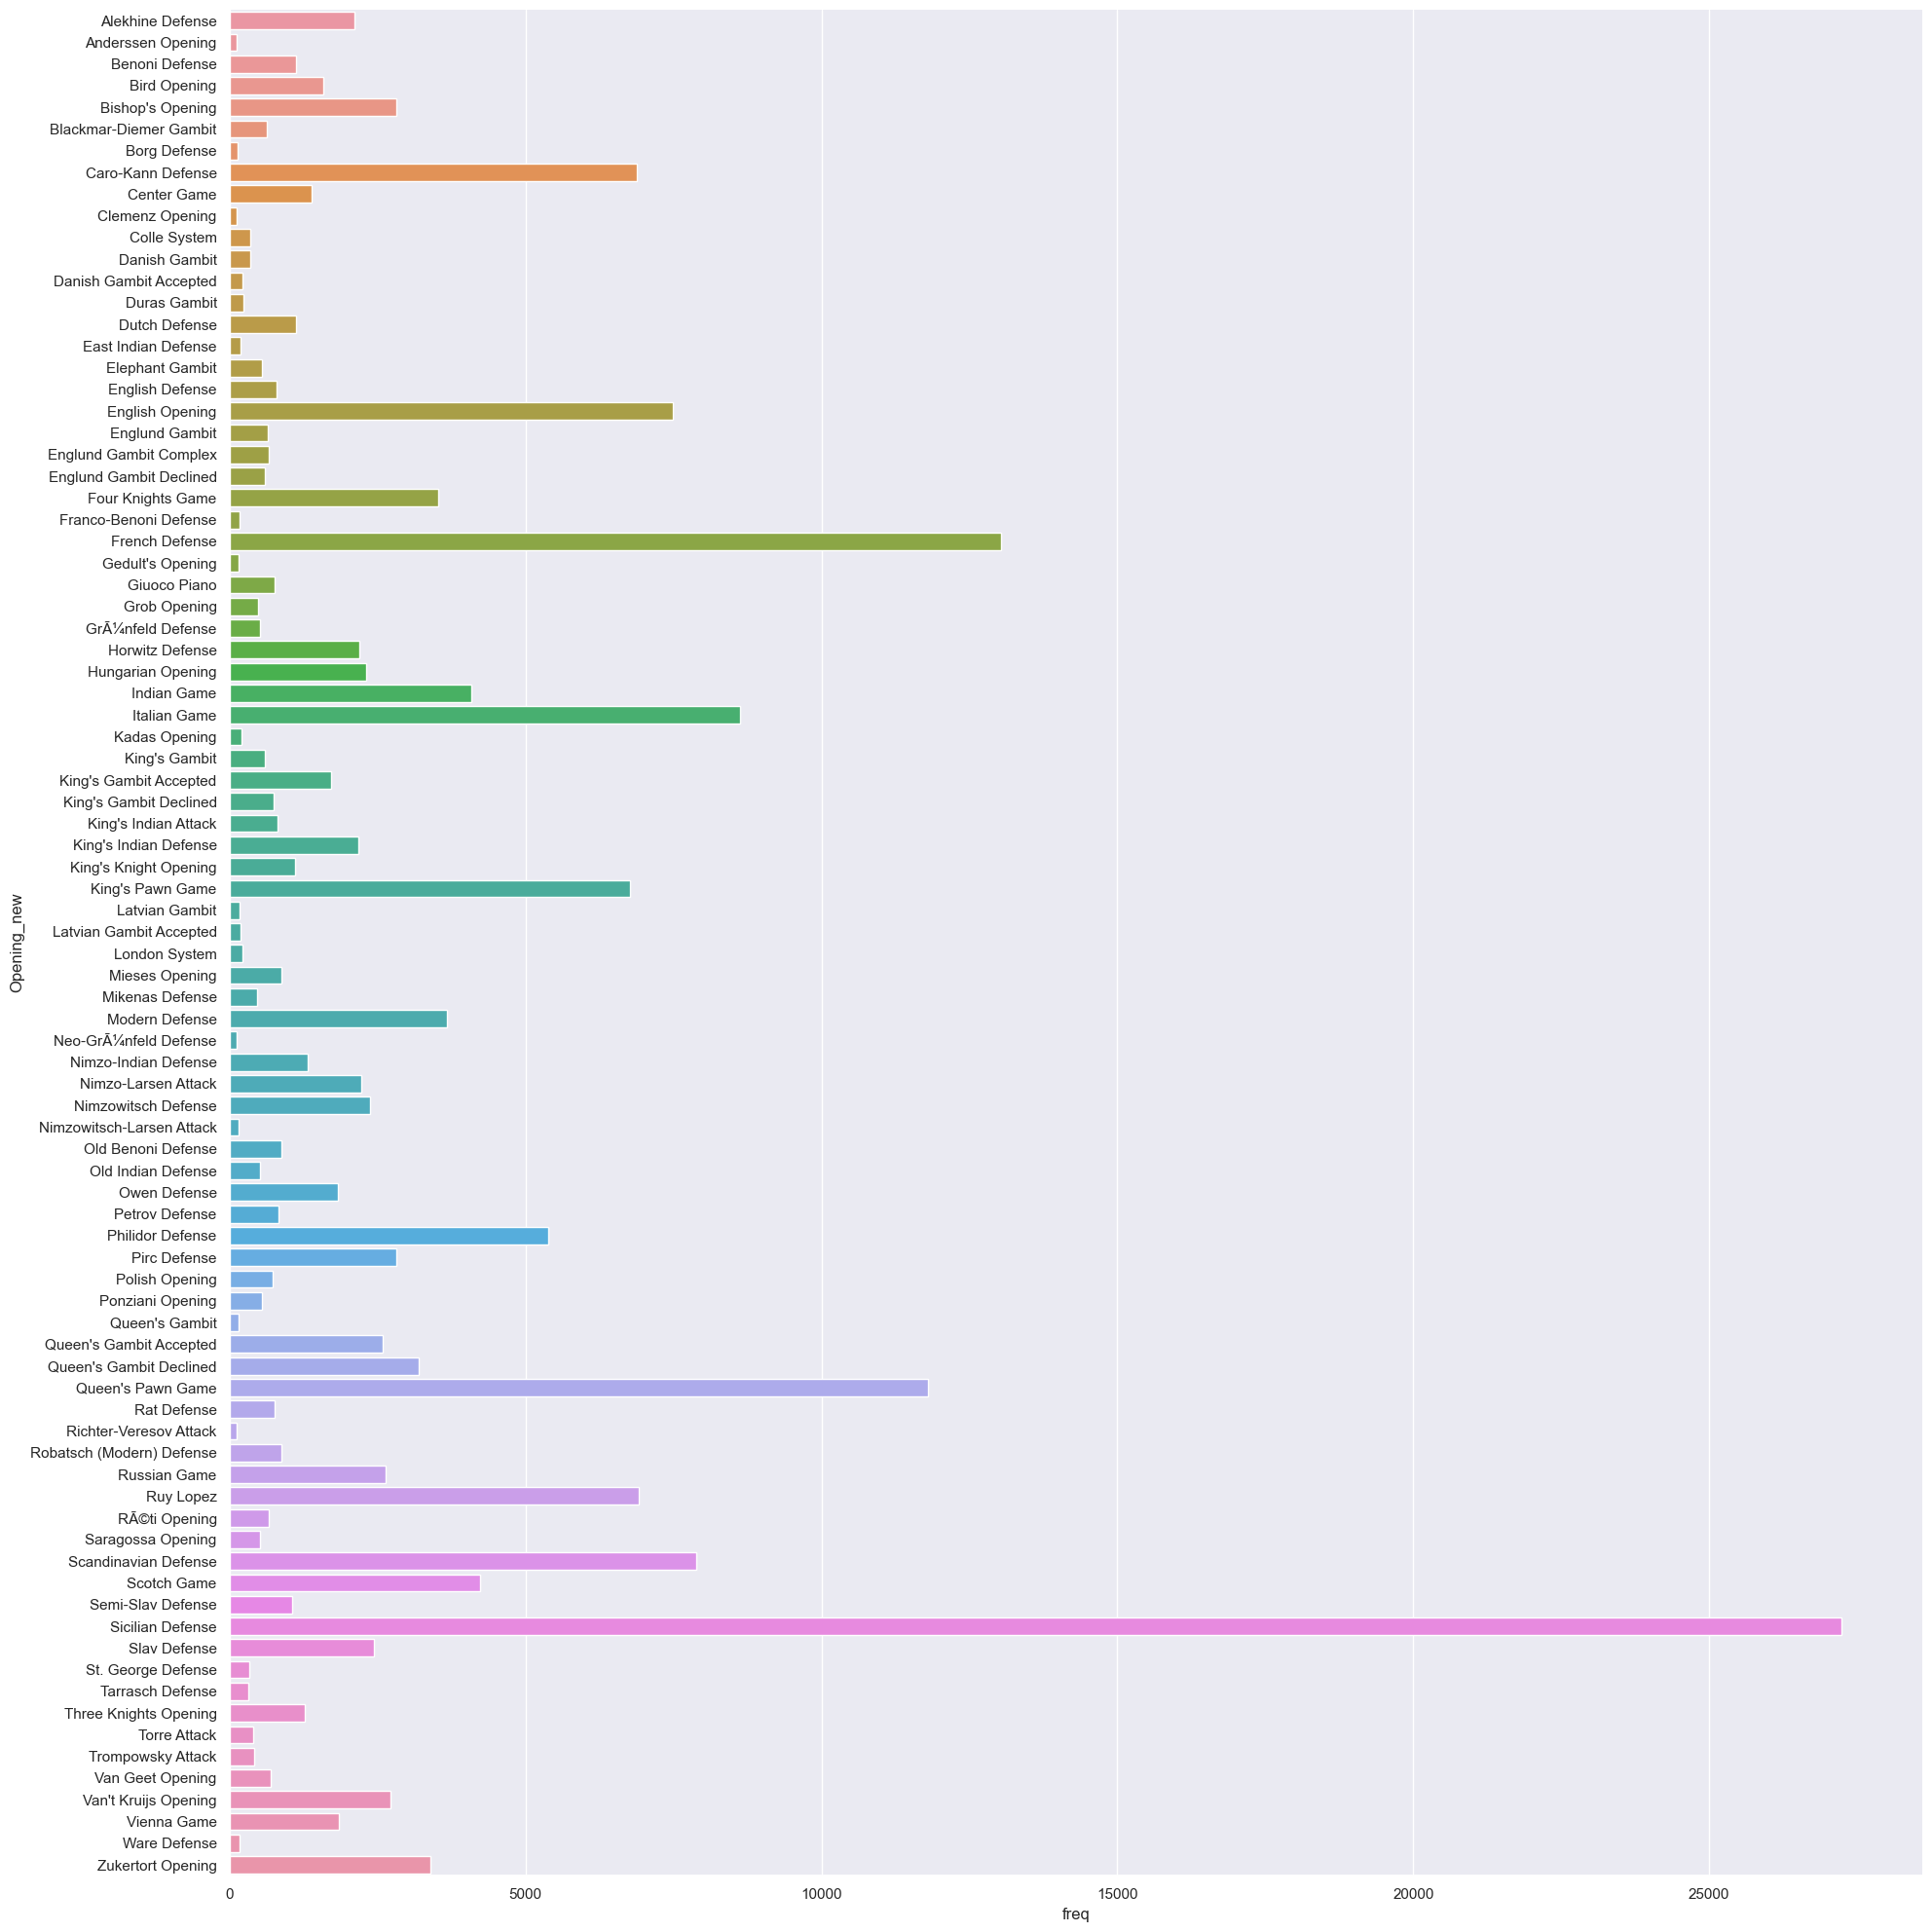

In [6]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [7]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [8]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_27644\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_27644\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
4707,Tarrasch Defense,1,0,0.0
2335,Franco-Benoni Defense,1,0,0.0
3731,Anderssen Opening,3,0,0.0
729,Neo-GrÃ¼nfeld Defense,1,0,0.0
3217,Borg Defense,6,1,0.166667
...,...,...,...,...
697,Old Indian Defense,6,5,0.833333
398,Duras Gambit,6,5,0.833333
488,Nimzowitsch-Larsen Attack,2,2,1.0
2515,Semi-Slav Defense,2,2,1.0


Win rate for white

In [9]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
95,Four Knights Game,158,64,0.405063
25,Van't Kruijs Opening,137,60,0.437956
2,Sicilian Defense,357,158,0.442577
16,French Defense,296,134,0.452703
21,King's Pawn Game,534,250,0.468165
9,Queen's Pawn Game,573,271,0.472949
15,Alekhine Defense,112,54,0.482143
53,Russian Game,133,65,0.488722
43,Bishop's Opening,103,52,0.504854
24,Scandinavian Defense,238,127,0.533613


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [10]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_27644\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_27644\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
488,Nimzowitsch-Larsen Attack,2,0,0.0
1065,GrÃ¼nfeld Defense,3,0,0.0
2335,Franco-Benoni Defense,1,0,0.0
2515,Semi-Slav Defense,2,0,0.0
697,Old Indian Defense,6,1,0.166667
...,...,...,...,...
356,Benoni Defense,13,10,0.769231
3217,Borg Defense,6,5,0.833333
729,Neo-GrÃ¼nfeld Defense,1,1,1.0
3731,Anderssen Opening,3,3,1.0


Winrate for Black

In [11]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
10,Philidor Defense,194,66,0.340206
5,Ruy Lopez,128,44,0.34375
118,Scotch Game,135,51,0.377778
116,English Opening,153,60,0.392157
17,Italian Game,170,69,0.405882
30,Nimzowitsch Defense,129,56,0.434109
24,Scandinavian Defense,238,105,0.441176
43,Bishop's Opening,103,49,0.475728
53,Russian Game,133,65,0.488722
9,Queen's Pawn Game,573,283,0.493892


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [12]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [13]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [14]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [15]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5271 non-null   int64  
 1   BlackElo      5271 non-null   int64  
 2   ECO           5271 non-null   object 
 3   Event         5271 non-null   object 
 4   Opening       5271 non-null   object 
 5   Result        5271 non-null   object 
 6   Termination   5271 non-null   object 
 7   TimeControl   5271 non-null   object 
 8   WhiteElo      5271 non-null   int64  
 9   BlackTitle    0 non-null      float64
 10  WhiteTitle    0 non-null      float64
 11  Move_ply_200  3 non-null      object 
 12  Category      5271 non-null   object 
 13  Opening_new   5271 non-null   object 
 14  freq          5271 non-null   int64  
 15  ELO Diff      5271 non-null   int64  
 16  Ave ELO       5271 non-null   float64
 17  tot           5271 non-null   int64  
dtypes: float64(3), int64(6), obj

In [16]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

[Text(0.553125, 0.9285714285714286, 'ELO Diff <= 18.5\ngini = 0.518\nsamples = 3689\nvalue = [1810, 67, 1812]\nclass = White'),
 Text(0.2703125, 0.7857142857142857, 'ELO Diff <= -108.5\ngini = 0.511\nsamples = 2377\nvalue = [1310, 45, 1022]\nclass = Black'),
 Text(0.134375, 0.6428571428571429, 'Opening_new_Ruy Lopez <= 0.5\ngini = 0.46\nsamples = 386\nvalue = [255, 7, 124]\nclass = Black'),
 Text(0.08125, 0.5, 'Opening_new_Philidor Defense <= 0.5\ngini = 0.452\nsamples = 373\nvalue = [250, 6, 117]\nclass = Black'),
 Text(0.05, 0.35714285714285715, 'Opening_new_Scotch Game <= 0.5\ngini = 0.447\nsamples = 363\nvalue = [246, 6, 111]\nclass = Black'),
 Text(0.025, 0.21428571428571427, 'Opening_new_Englund Gambit Declined <= 0.5\ngini = 0.442\nsamples = 355\nvalue = [243, 6, 106]\nclass = Black'),
 Text(0.0125, 0.07142857142857142, 'gini = 0.438\nsamples = 351\nvalue = [242, 6, 103]\nclass = Black'),
 Text(0.0375, 0.07142857142857142, 'gini = 0.375\nsamples = 4\nvalue = [1, 0, 3]\nclass = W

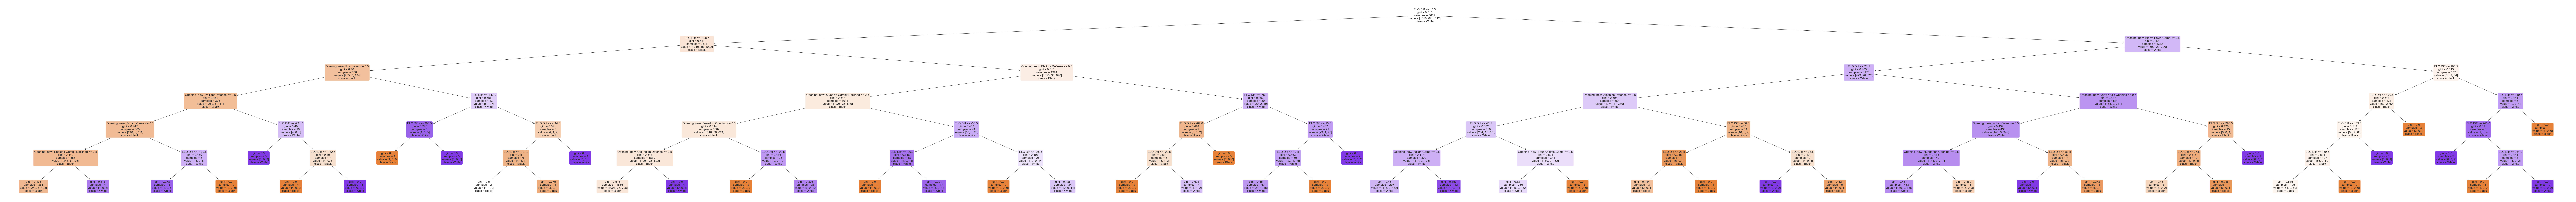

In [17]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])